# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
* Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
groups = pd.read_csv('nashville-meetup/group-edges.csv')
groups.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [6]:
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [7]:
group_dict = dict(zip(groups_meta.group_id, groups_meta.group_name))

G = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    G.add_edge(g1, g2, weight=weight)

## Visualize the Network

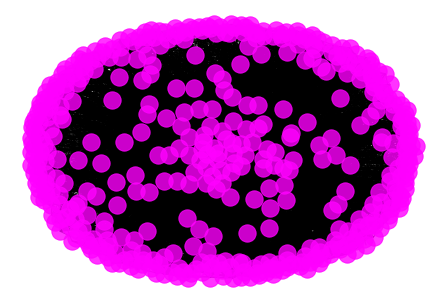

In [8]:
nx.draw(G, pos=nx.spring_layout(G, k=2, seed=5), alpha=0.8, node_color="magenta")

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [9]:
for i in range(0,100,5):
    print("{}th percentile: {}".format(i,groups.weight.quantile(q=i/100)))

0th percentile: 1.0
5th percentile: 1.0
10th percentile: 1.0
15th percentile: 1.0
20th percentile: 1.0
25th percentile: 1.0
30th percentile: 1.0
35th percentile: 1.0
40th percentile: 1.0
45th percentile: 1.0
50th percentile: 1.0
55th percentile: 1.0
60th percentile: 1.0
65th percentile: 1.0
70th percentile: 2.0
75th percentile: 2.0
80th percentile: 2.0
85th percentile: 3.0
90th percentile: 4.0
95th percentile: 7.0


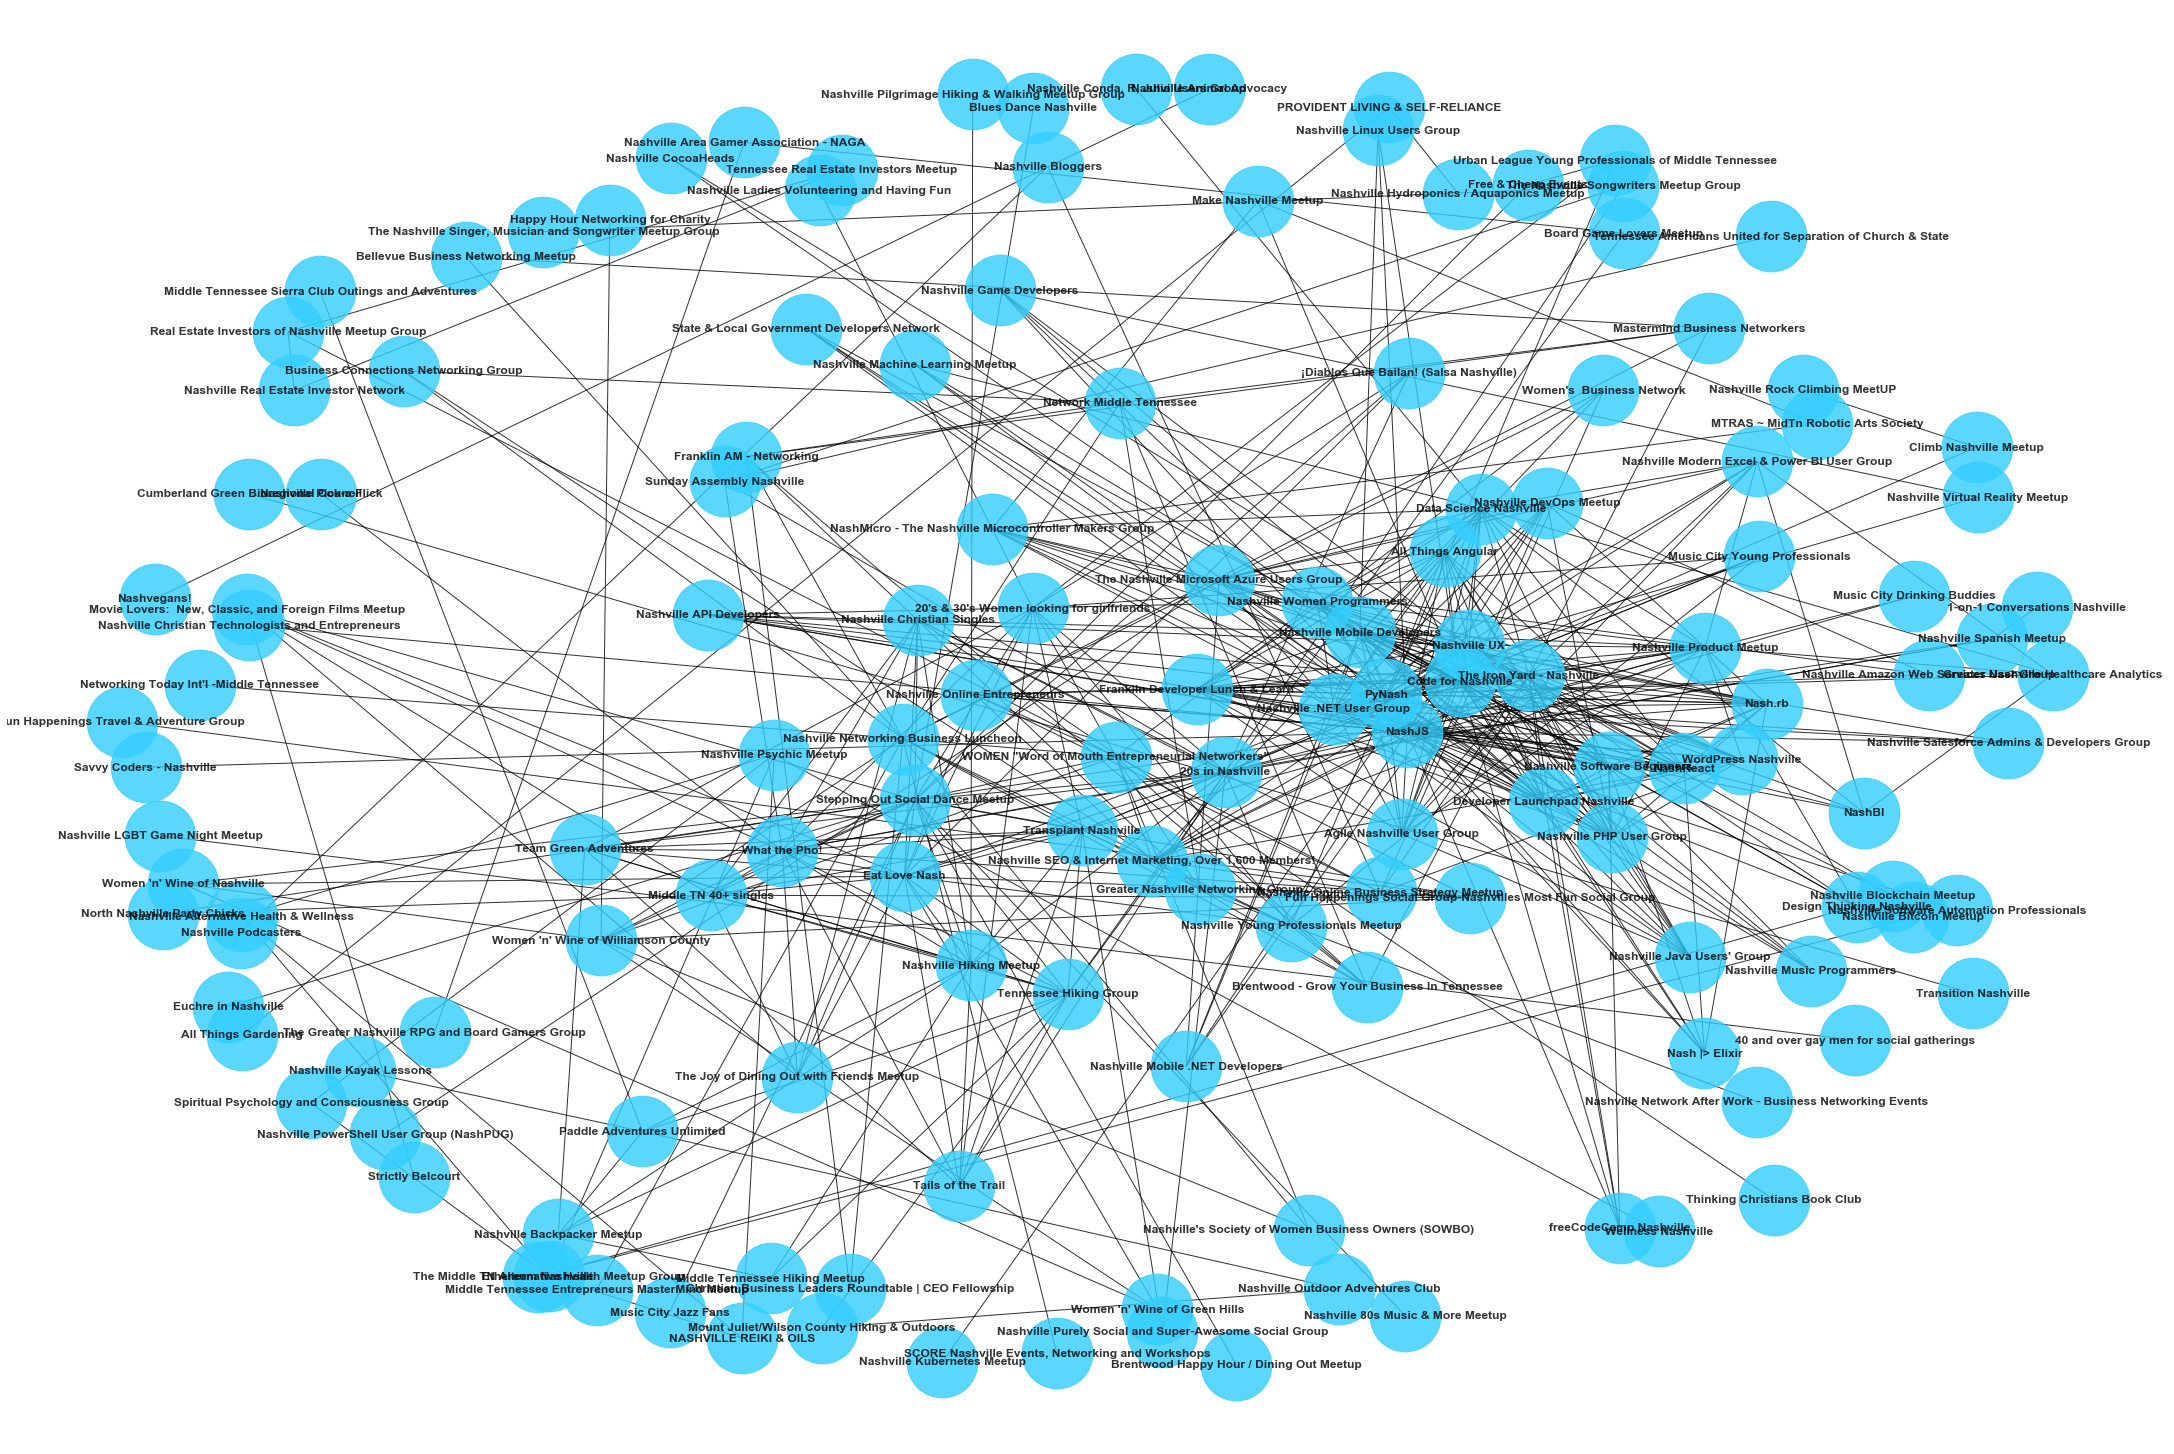

In [10]:
threshold = 5
G_subset = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    if weight > threshold:
        G_subset.add_edge(g1, g2, weight=weight)
plt.figure(figsize=(30,20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
        alpha=.8, node_color="#32cefe", node_size=5000,
        with_labels=True, font_size=12, font_weight="bold")

## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [11]:
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))

for n, clusters in enumerate(gn_clusters):
    print("After removing {} edges, there are {} clusters.".format(n, len(clusters)))

After removing 0 edges, there are 7 clusters.
After removing 1 edges, there are 8 clusters.
After removing 2 edges, there are 9 clusters.
After removing 3 edges, there are 10 clusters.
After removing 4 edges, there are 11 clusters.
After removing 5 edges, there are 12 clusters.
After removing 6 edges, there are 13 clusters.
After removing 7 edges, there are 14 clusters.
After removing 8 edges, there are 15 clusters.
After removing 9 edges, there are 16 clusters.
After removing 10 edges, there are 17 clusters.
After removing 11 edges, there are 18 clusters.
After removing 12 edges, there are 19 clusters.
After removing 13 edges, there are 20 clusters.
After removing 14 edges, there are 21 clusters.
After removing 15 edges, there are 22 clusters.
After removing 16 edges, there are 23 clusters.
After removing 17 edges, there are 24 clusters.
After removing 18 edges, there are 25 clusters.
After removing 19 edges, there are 26 clusters.
After removing 20 edges, there are 27 clusters.
After

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

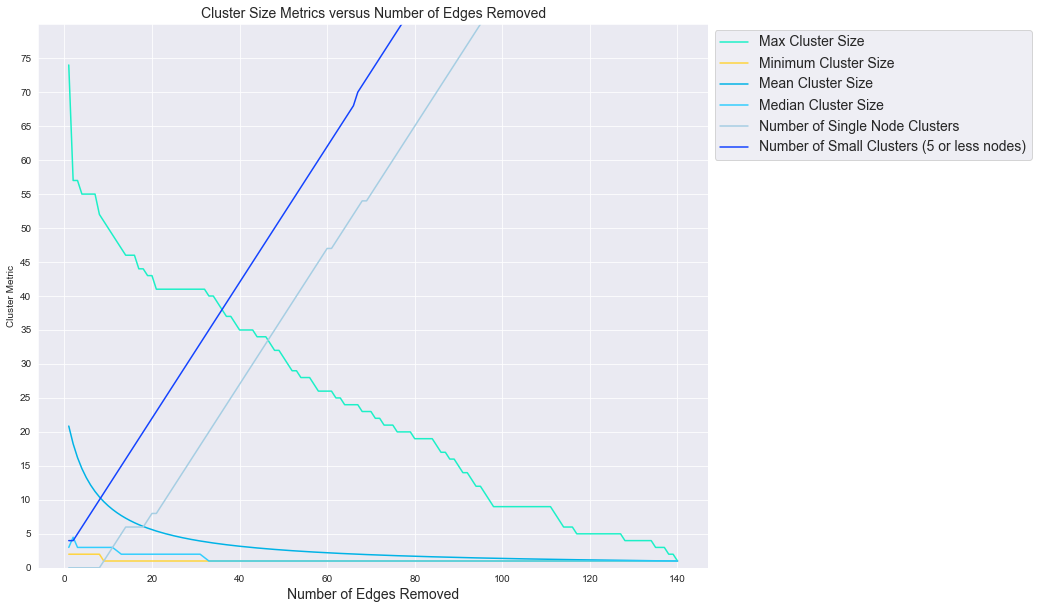

In [12]:
sns.set_style('darkgrid')
colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

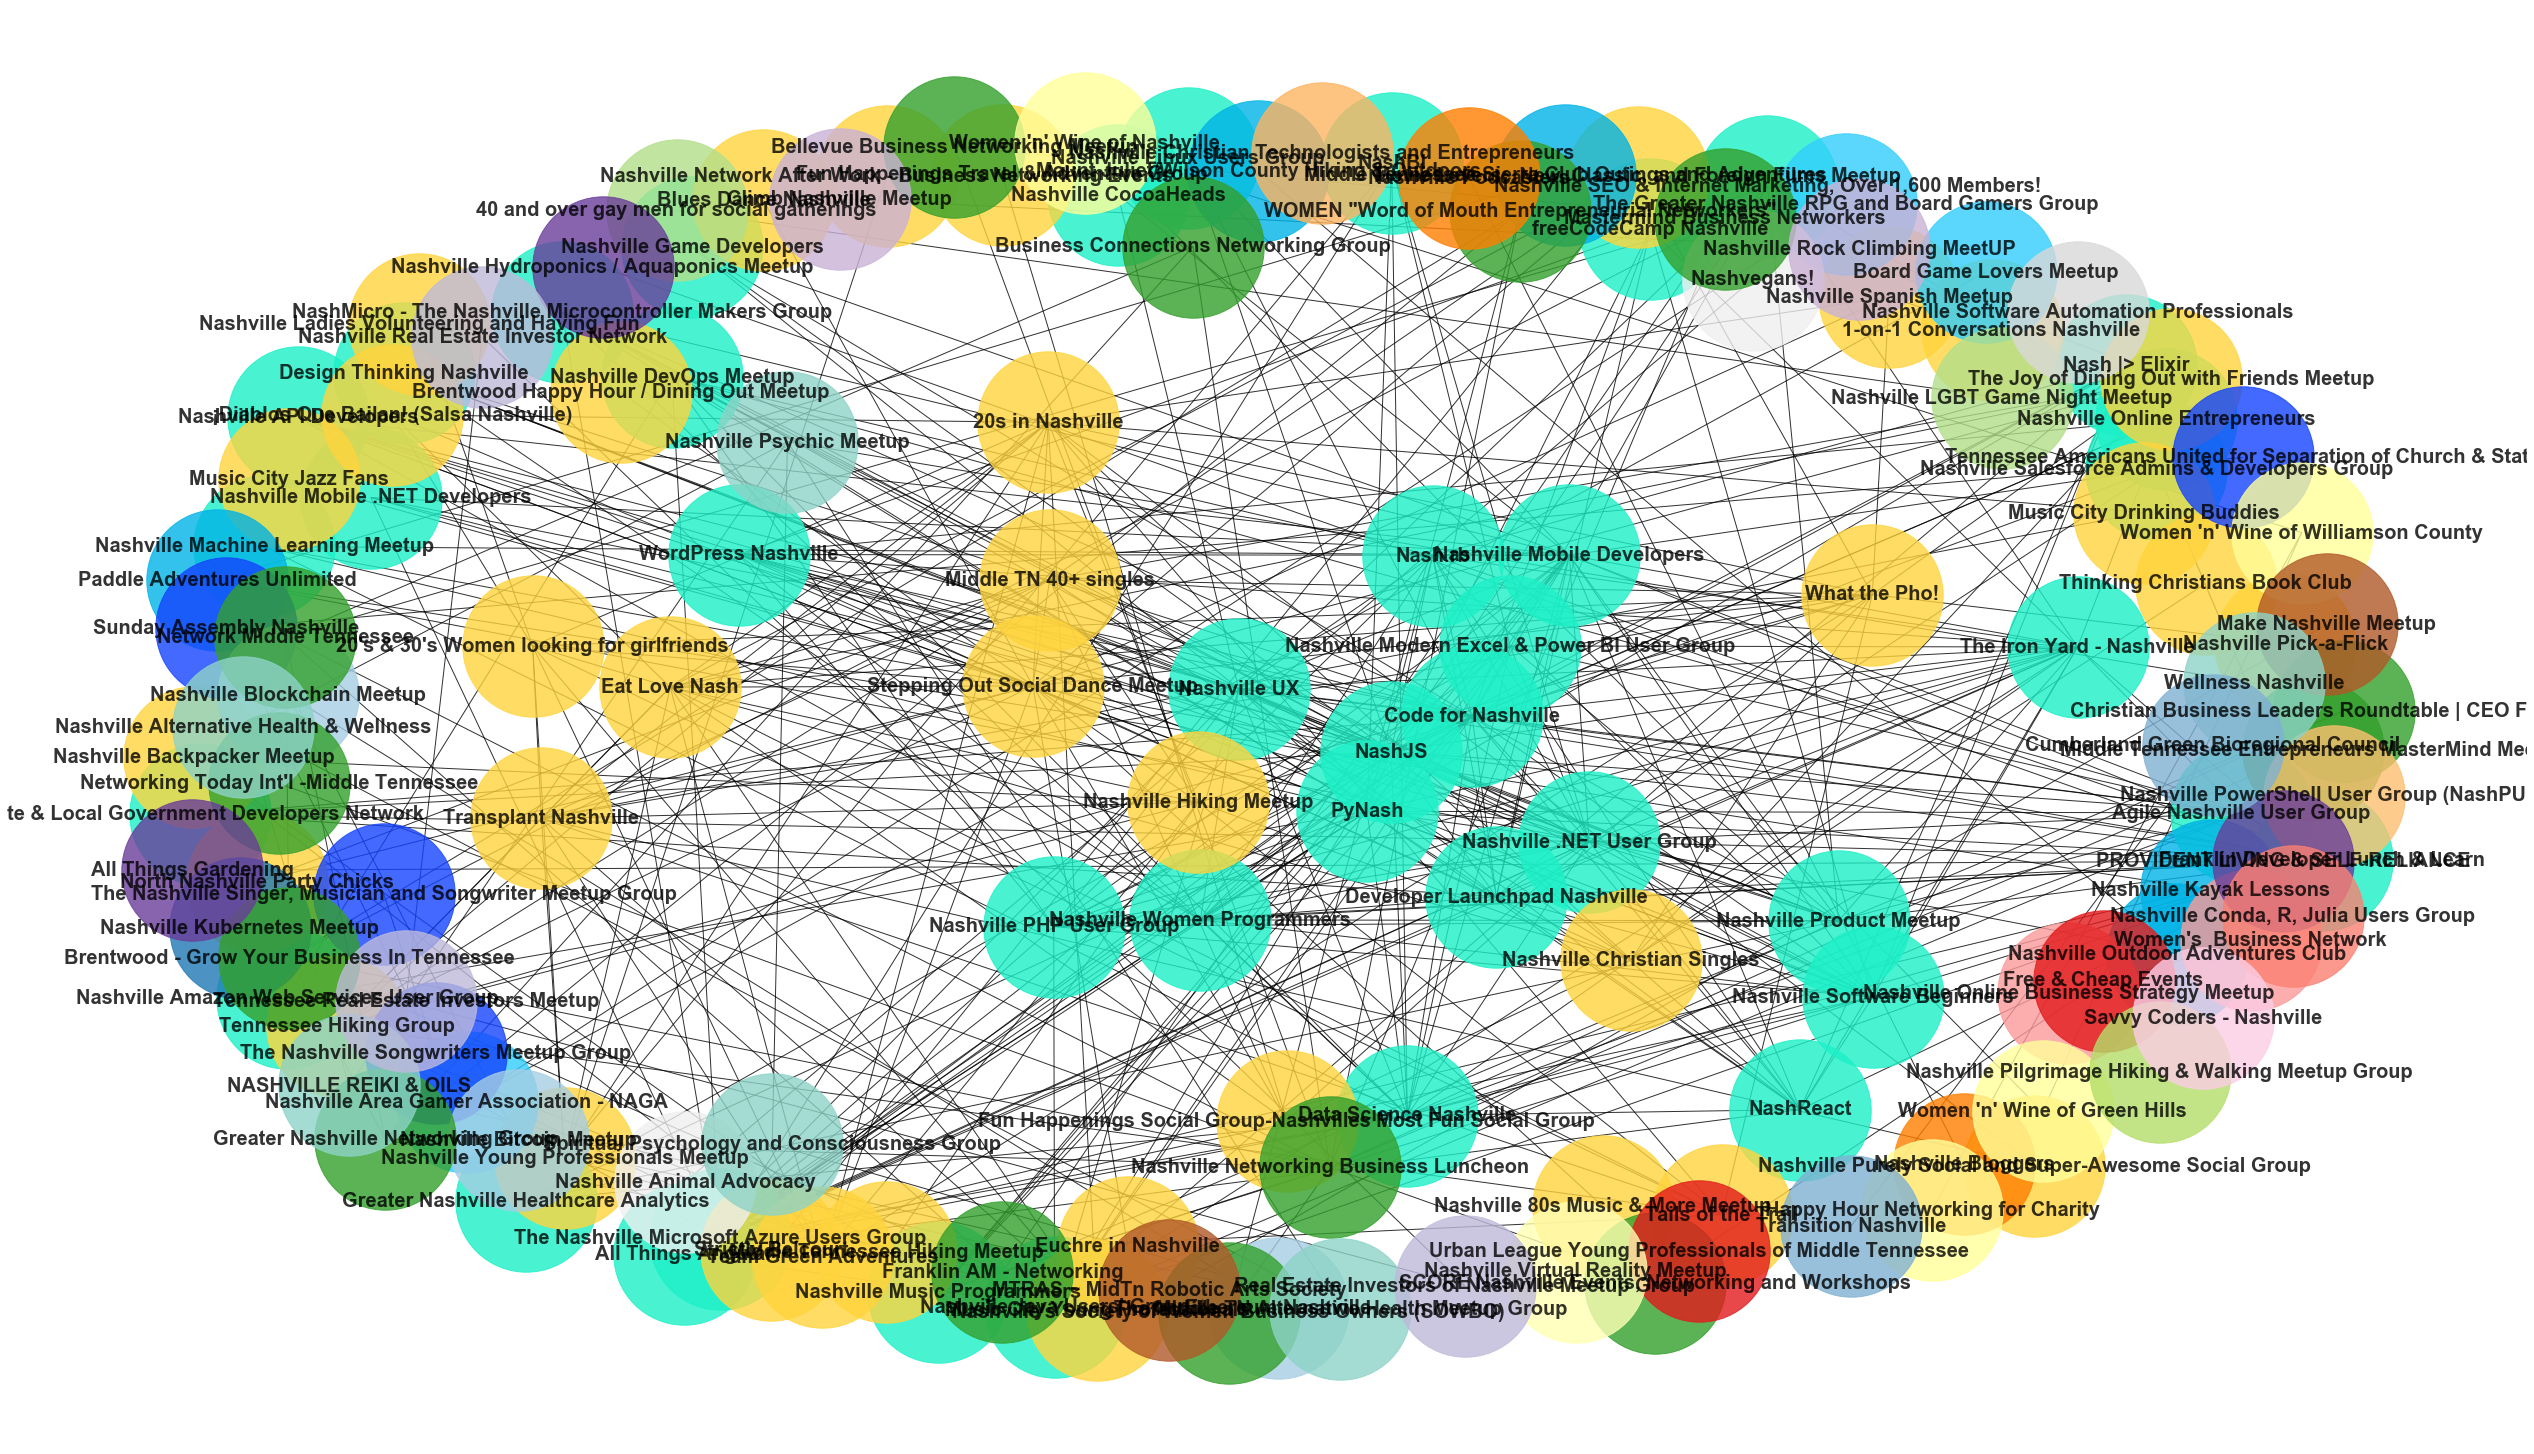

In [13]:
def plot_girvan_newman(G, clusters):
    fig = plt.figure(figsize=(35,20))
    colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]
    for n , c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G_subset, k=3.6, seed=3), with_labels=True, node_color=colors[n],
                alpha=.8, node_size=20000, font_weight="bold", font_size=20)
    plt.show()
sns.set_style('white')
plot_girvan_newman(G_subset, gn_clusters[20])

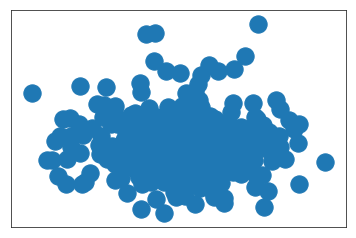

In [25]:
nx.draw_networkx_nodes(G,pos=nx.spring_layout(G))

In [27]:
x = list(gn_clusters[20])
clusters = pd.DataFrame(x).transpose()

In [28]:
clusters.columns = ["Cluster{}".format(i) for i in range(1,len(clusters.columns)+1)]
clusters

Cluster1  \
0                    Franklin Developer Lunch & Learn   
1                    Nashville Mobile .NET Developers   
2                         Nashville Java Users' Group   
3                          Agile Nashville User Group   
4                              Data Science Nashville   
5                         Nashville Women Programmers   
6                                Nashville CocoaHeads   
7           The Nashville Microsoft Azure Users Group   
8                                             Nash.rb   
9                           Nashville .NET User Group   
10                        Nashville Music Programmers   
11  NashMicro - The Nashville Microcontroller Make...   
12                                WordPress Nashville   
13       Nashville Modern Excel & Power BI User Group   
14                            Nashville DevOps Meetup   
15                        Nashville Mobile Developers   
16                        Nashville Linux Users Group   
17                                 Code for Nashville   
18                                 All Things Angular   
19        State & Local Government Developers Network   
20                           Nashville PHP User Group   
21                      Developer Launchpad Nashville   
22                          Design Thinking Nashville   
23                                     Nash |> Elixir   
24                          Nashville Game Developers   
25                             freeCodeCamp Nashville   
26                           Nashville Product Meetup   
27                     Nashville Online Entrepreneurs   
28  Nashville SEO & Internet Marketing, Over 1,600...   
29                                             NashJS   
30                                       Nashville UX   
31                                             PyNash   
32                                          NashReact   
33     Nashville Salesforce Admins & Developers Group   
34                          The Iron Yard - Nashville   
35                  Nashville Machine Learning Meetup   
36             Greater Nashville Healthcare Analytics   
37                                             NashBI   
38           Nashville Amazon Web Services User Group   
39                           Nashville API Developers   
40                       Nashville Software Beginners   

                                             Cluster2  \
0             Fun Happenings Travel & Adventure Group   
1   Fun Happenings Social Group-Nashvilles Most Fu...   
2                        North Nashville Party Chicks   
3   Nashville Purely Social and Super-Awesome Soci...   
4                    Stepping Out Social Dance Meetup   
5                                  Tails of the Trail   
6   Movie Lovers:  New, Classic, and Foreign Films...   
7                         Music City Drinking Buddies   
8                      1-on-1 Conversations Nashville   
9                                       Eat Love Nash   
10                                      What the Pho!   
11               Nashville Young Professionals Meetup   
12                            Nashville Hiking Meetup   
13                     Middle Tennessee Hiking Meetup   
14                              Team Green Adventures   
15                     Music City Young Professionals   
16                                Euchre in Nashville   
17                             Nashville Pick-a-Flick   
18                        Nashville Backpacker Meetup   
19                      Thinking Christians Book Club   
20                               Music City Jazz Fans   
21          20's & 30's Women looking for girlfriends   
22                              Middle TN 40+ singles   
23                               Transplant Nashville   
24                             Tennessee Hiking Group   
25          The Joy of Dining Out with Friends Meetup   
26           Brentwood Happy Hour / Dining Out Meetup   
27                                  Strictly Belcourt 

In [29]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 27 columns):
Cluster1     41 non-null object
Cluster2     36 non-null object
Cluster3     5 non-null object
Cluster4     3 non-null object
Cluster5     2 non-null object
Cluster6     4 non-null object
Cluster7     3 non-null object
Cluster8     1 non-null object
Cluster9     2 non-null object
Cluster10    14 non-null object
Cluster11    2 non-null object
Cluster12    2 non-null object
Cluster13    1 non-null object
Cluster14    2 non-null object
Cluster15    2 non-null object
Cluster16    3 non-null object
Cluster17    4 non-null object
Cluster18    2 non-null object
Cluster19    6 non-null object
Cluster20    1 non-null object
Cluster21    3 non-null object
Cluster22    1 non-null object
Cluster23    2 non-null object
Cluster24    1 non-null object
Cluster25    1 non-null object
Cluster26    1 non-null object
Cluster27    1 non-null object
dtypes: object(27)
memory usage: 8.7+ KB


## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               